In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

## Age group incidence

In [149]:
ag_df = pd.read_csv("./final_dataset/age_group_incidence.csv", low_memory=False).dropna()

In [150]:
ag_df.head()

,year,category,region,age_group,incidence,nhospotal,nbeds,ybeds,nill,nvillage_ill,...,nultrasound,ndialysis,gdp,air_pollution,polluted_dumps,not_cleaned_dumps,dumps_not_cleaned_enough,num_clearing_plants,cpi,population
0,2010,Злоякiснi новоутворення-всього C00-C97...,Вінницька,до 1 р.,1,109,12441,12423.0,368335,190347,...,54,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0
1,2010,Злоякiснi новоутворення-всього C00-C97...,Вінницька,1-4 р.,5,109,12441,12423.0,368335,190347,...,54,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0
2,2010,Злоякiснi новоутворення-всього C00-C97...,Вінницька,5-9 р.,2,109,12441,12423.0,368335,190347,...,54,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0
3,2010,Злоякiснi новоутворення-всього C00-C97...,Вінницька,10-14р,5,109,12441,12423.0,368335,190347,...,54,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0
4,2010,Злоякiснi новоутворення-всього C00-C97...,Вінницька,15-19р,4,109,12441,12423.0,368335,190347,...,54,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0


## Stage incidence

In [151]:
st_df = pd.read_csv('./final_dataset/stage_incidence.csv').dropna()

In [152]:
st_df.head()

,year,region,mtumors,syncmtumors,insitu,ncervix,nhospotal,nbeds,ybeds,nill,...,ndialysis,gdp,air_pollution,polluted_dumps,not_cleaned_dumps,dumps_not_cleaned_enough,num_clearing_plants,cpi,population,tincidence
0,2010,Вінницька,356,112,113,103,109,12441,12423.0,368335,...,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0,5587
1,2010,Волинська,177,50,81,77,52,7653,7650.0,229994,...,2,13916.0,8.2,4.0,1.0,3.0,78.0,109.1,1036665.0,2845
2,2010,Дніпропетровська,767,212,174,150,155,29713,29892.0,805622,...,1,34709.0,933.1,504.0,133.0,371.0,983.0,109.1,3355481.0,12310
3,2010,Донецька,906,234,57,24,173,32134,32193.0,893383,...,6,28986.0,1378.1,550.0,17.0,533.0,1511.0,109.1,4466740.0,15088
4,2010,Житомирська,285,94,33,30,69,8621,8635.9,282862,...,1,14616.0,18.4,6.0,0.0,6.0,104.0,109.1,1285849.0,3957


# EDA

In [153]:
def plot_ts(ts, column_name, title):
    plt.figure(figsize=(12, 6))

    sns.lineplot(x=ts['year'], y=ts[column_name], linewidth=2.5, color='b', marker='o', markersize=5)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show

## Age Group incidence

In [154]:
total_male_category = "Злоякiснi новоутворення-всього         C00-C97    ч"
total_female_category = "C00-C97    ж"

### Total incidence

In [155]:
age_groups = ag_df.age_group.unique()

population_th = ag_df.population / 100000

ag_df['pincidence'] = ag_df.incidence / population_th

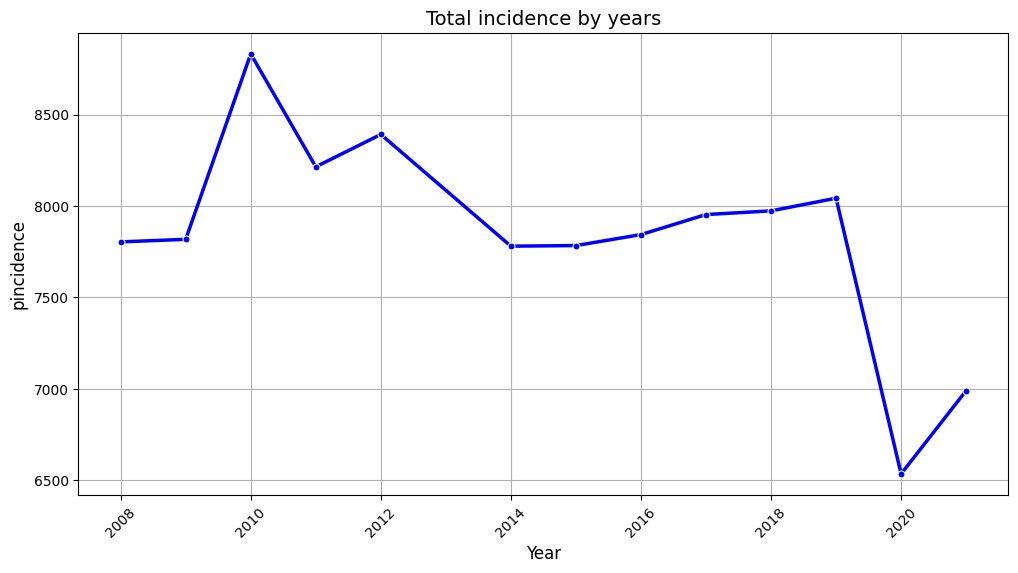

In [156]:
total = ag_df[ag_df.category.isin([total_male_category, total_female_category])].groupby(['year']).agg({'pincidence': 'sum'}).reset_index()
plot_ts(total, "pincidence", "Total incidence by years")

## Stage dataset

In [157]:
st_df.head()

,year,region,mtumors,syncmtumors,insitu,ncervix,nhospotal,nbeds,ybeds,nill,...,ndialysis,gdp,air_pollution,polluted_dumps,not_cleaned_dumps,dumps_not_cleaned_enough,num_clearing_plants,cpi,population,tincidence
0,2010,Вінницька,356,112,113,103,109,12441,12423.0,368335,...,1,14332.0,103.0,2.0,0.0,2.0,98.0,109.1,1650608.0,5587
1,2010,Волинська,177,50,81,77,52,7653,7650.0,229994,...,2,13916.0,8.2,4.0,1.0,3.0,78.0,109.1,1036665.0,2845
2,2010,Дніпропетровська,767,212,174,150,155,29713,29892.0,805622,...,1,34709.0,933.1,504.0,133.0,371.0,983.0,109.1,3355481.0,12310
3,2010,Донецька,906,234,57,24,173,32134,32193.0,893383,...,6,28986.0,1378.1,550.0,17.0,533.0,1511.0,109.1,4466740.0,15088
4,2010,Житомирська,285,94,33,30,69,8621,8635.9,282862,...,1,14616.0,18.4,6.0,0.0,6.0,104.0,109.1,1285849.0,3957


In [158]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 0 to 361
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      314 non-null    int64  
 1   region                    314 non-null    object 
 2   mtumors                   314 non-null    int64  
 3   syncmtumors               314 non-null    int64  
 4   insitu                    314 non-null    int64  
 5   ncervix                   314 non-null    int64  
 6   nhospotal                 314 non-null    int64  
 7   nbeds                     314 non-null    int64  
 8   ybeds                     314 non-null    float64
 9   nill                      314 non-null    int64  
 10  nvillage_ill              314 non-null    int64  
 11  bed_days                  314 non-null    int64  
 12  dvisits                   314 non-null    int64  
 13  hvisits                   314 non-null    int64  
 14  ndoctors       

### Feature engineering

In [159]:

st_f_df = st_df.copy()

population_th = st_f_df.population / 100000
st_f_df['mtumors_pht'] = st_f_df.mtumors / population_th
st_f_df['syncmtumors_pht'] = st_f_df.syncmtumors / population_th
st_f_df['insitu_pht'] = st_f_df.insitu / population_th
st_f_df['insitu_pti'] = st_f_df.insitu / (st_f_df['tincidence'] / 1000)
st_f_df['mtumors_pti'] = st_f_df.mtumors / (st_f_df['tincidence'] / 1000)


population_related_columns = ['nhospotal', 'nbeds', 'ybeds', 'nill', 'nvillage_ill', 'bed_days', 'dvisits', 'hvisits', 'ndoctors', 
                              'nnursing', 'nx_ray', 'nflurography', 'nradiology', 'nradlab', 'nсt', 'ncardiogram', 'ndiaglab',
                              'nbacter', 'nbiochem', 'ncyto', 'nimun', 'nphysic', 'nendoscop', 'nultrasound', 'ndialysis', 'population',
                              'tincidence']

for column in population_related_columns:
    st_f_df[column] = (st_f_df[column] / population_th).round(4)

st_f_df = st_f_df.rename(columns={column: f"{column}_pht" for column in population_related_columns})

In [160]:
st_f_df.to_csv("./final_dataset/stage_incidence_features.csv", index=False)

### Multiple tumors ts

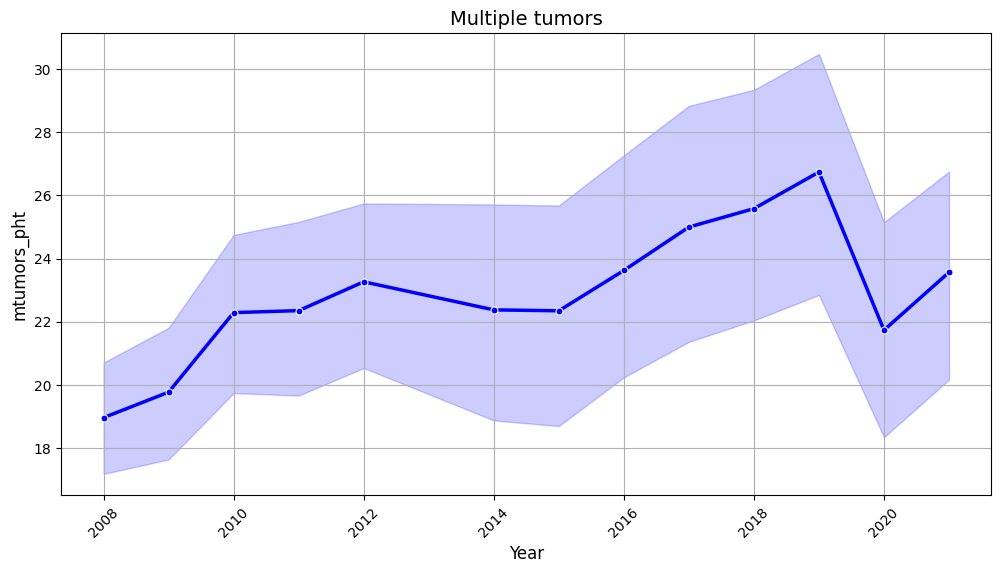

In [161]:
plot_ts(st_f_df, 'mtumors_pht', "Multiple tumors")

### Syncronously located tumors

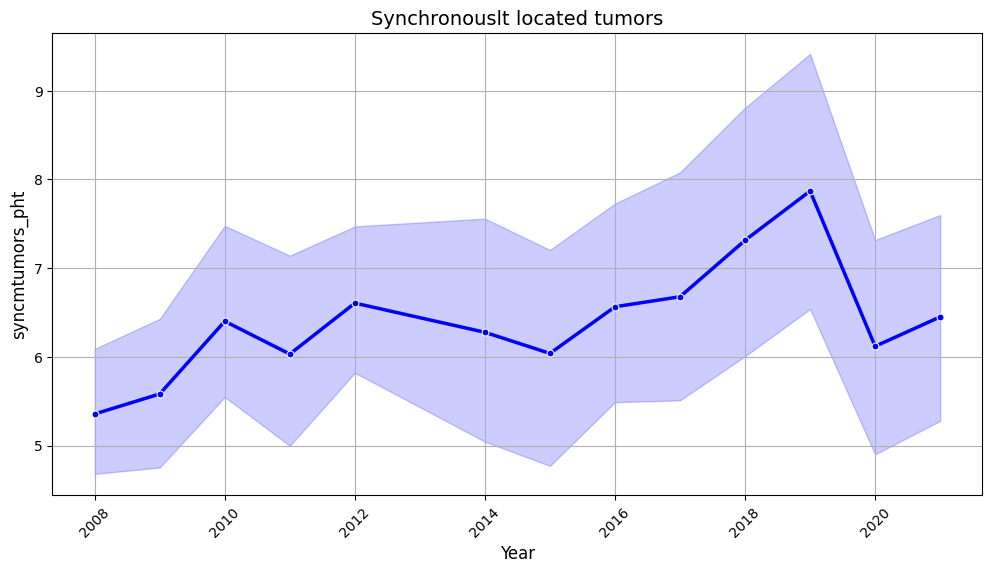

In [162]:
plot_ts(st_f_df, 'syncmtumors_pht', "Synchronouslt located tumors")

### Tumors insitu ts

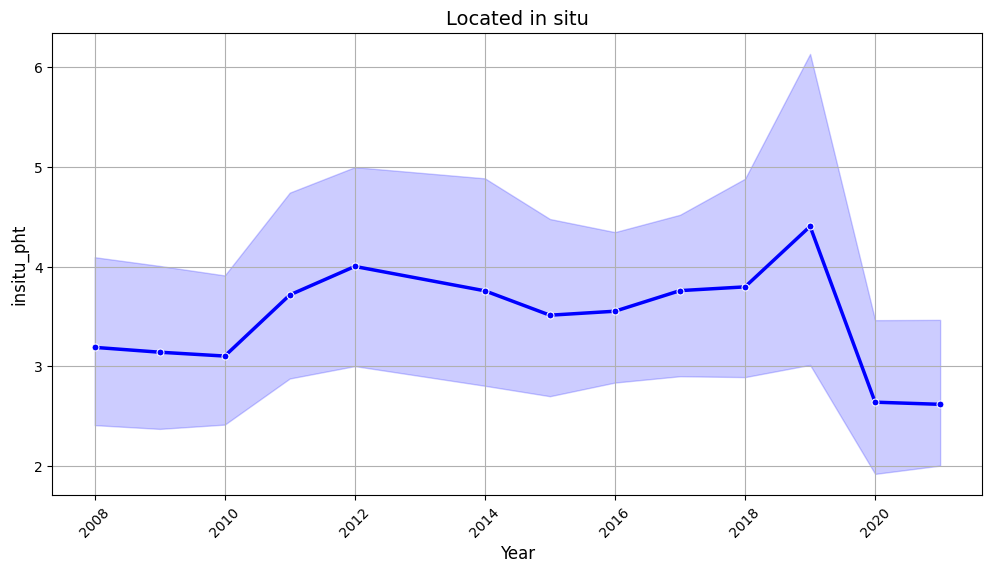

In [163]:
plot_ts(st_f_df, 'insitu_pht', "Located in situ")

### Insitu tumors per 1000 diagnosed cancer

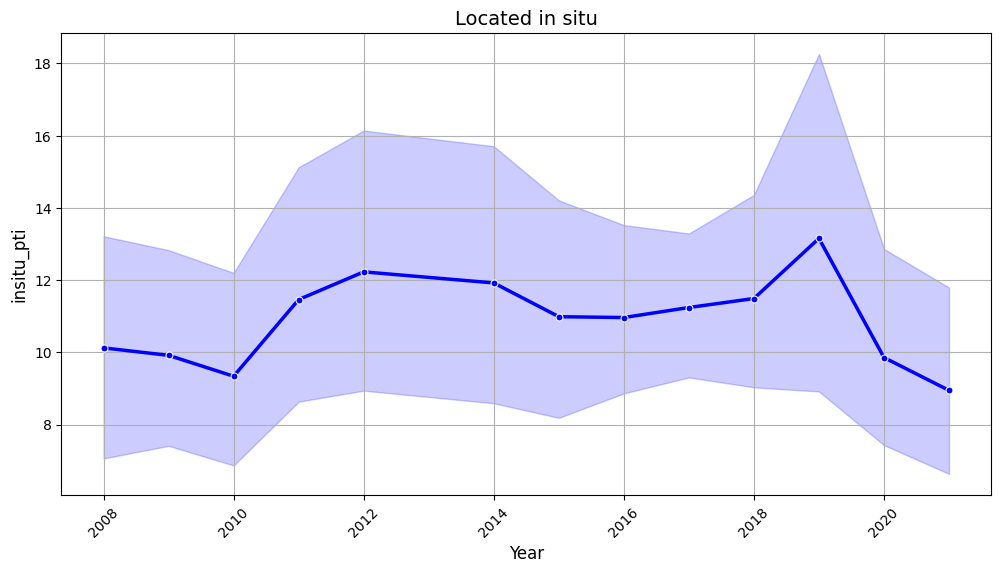

In [164]:
plot_ts(st_f_df, 'insitu_pti', "Located in situ")

### Multiple tumors per 1000 diagnosed cancer

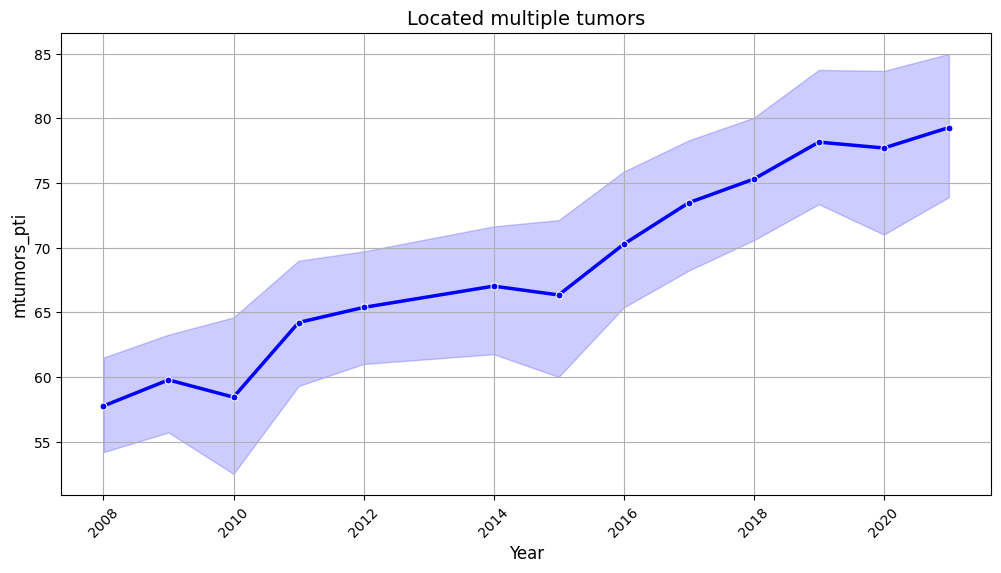

In [165]:
plot_ts(st_f_df, 'mtumors_pti', "Located multiple tumors")

In [166]:
st_f_df.columns

Index(['year', 'region', 'mtumors', 'syncmtumors', 'insitu', 'ncervix',
       'nhospotal_pht', 'nbeds_pht', 'ybeds_pht', 'nill_pht',
       'nvillage_ill_pht', 'bed_days_pht', 'dvisits_pht', 'hvisits_pht',
       'ndoctors_pht', 'nnursing_pht', 'nx_ray_pht', 'nflurography_pht',
       'nradiology_pht', 'nradlab_pht', 'nсt_pht', 'ncardiogram_pht',
       'ndiaglab_pht', 'nbacter_pht', 'nbiochem_pht', 'ncyto_pht', 'nimun_pht',
       'nphysic_pht', 'nendoscop_pht', 'nultrasound_pht', 'ndialysis_pht',
       'gdp', 'air_pollution', 'polluted_dumps', 'not_cleaned_dumps',
       'dumps_not_cleaned_enough', 'num_clearing_plants', 'cpi',
       'population_pht', 'tincidence_pht', 'mtumors_pht', 'syncmtumors_pht',
       'insitu_pht', 'insitu_pti', 'mtumors_pti'],
      dtype='object')